In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

%run config.ipynb
%run models.ipynb
%run Dataset_preparation.ipynb

device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
def evaluate(x, y, model):
    
    confmat=np.zeros((9, 9))
    acc=0
    
    with torch.no_grad():

        for i in range(len(x)):
            x[i]=np.reshape(x[i], (1, 7, 7, 102, 1))
            inp=torch.from_numpy(x[i].astype(np.float32)).float()
            inp=inp.to(device)
            out=model(inp)
            _, pred=torch.max(out, dim=1)

            pre=pred.item()
#             if y[i]==1:
#                 print(f"{i} {out}")
            confmat[y[i]][pre]+=1
            
            if pre==y[i]:
                acc+=1

    return confmat, acc*100/len(y)

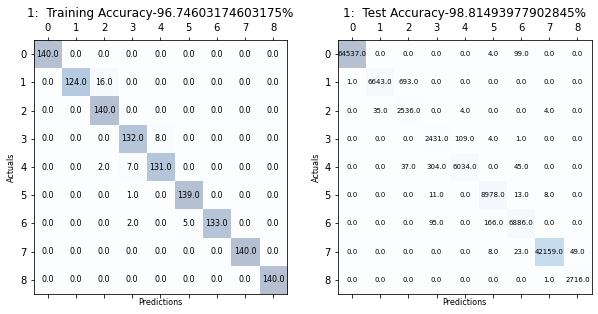

In [5]:
model=HResNet()
model=model.to(device)
model.eval()
models=[os.listdir(checkpoints)[3]]
if len(models)==0:
    print("No model has been trained")
else:
    ind=0
    for i in models:
        
        fig, ax = plt.subplots(1, 2, figsize=(10, 20))
        current=torch.load(os.path.join(checkpoints, i), map_location=device)
        model.load_state_dict(current["model_state_dict"])
        
        confmat, acc=evaluate(X_train, Y_train, model)
        ax[0].matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
        for i in range(confmat.shape[0]):
            for j in range(confmat.shape[1]):
                ax[0].text(x=j, y=i, s=confmat[i, j], va='center', ha='center', fontsize=8)
        
        ax[0].title.set_text(f"{ind+1}:  Training Accuracy-{acc}%")
        ax[0].set_xlabel('Predictions', fontsize=8)
        ax[0].set_ylabel('Actuals', fontsize=8)
        
        confmat, acc=evaluate(X_test, Y_test, model)
        ax[1].matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
        for i in range(confmat.shape[0]):
            for j in range(confmat.shape[1]):
                ax[1].text(x=j, y=i, s=confmat[i, j], va='center', ha='center', fontsize=7)
        
        ax[1].title.set_text(f"{ind+1}:  Test Accuracy-{acc}%")
        
        ax[1].set_xlabel('Predictions', fontsize=8)
        ax[1].set_ylabel('Actuals', fontsize=8)
        plt.show()
        
        ind+=1